In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle

In [12]:
data = pd.read_csv("/content/drive/MyDrive/INTERNSHIP/M.A.Miduna Varshini /Dataset/Iris.csv")

In [15]:
data.rename(columns={
    "SepalLengt": "SepalLengthCm",
    "SepalWidt": "SepalWidthCm",
    "PetalLengt": "PetalLengthCm",
    "PetalWidtht": "PetalWidthCm"
}, inplace=True)

In [16]:
X = data[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = data["Species"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [18]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [20]:
with open("/content/drive/MyDrive/INTERNSHIP/M.A.Miduna Varshini /Dataset/iris_random_forest.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved as iris_random_forest.pkl")

Model saved as iris_random_forest.pkl


In [21]:
import pickle
import numpy as np

# Load model
model = pickle.load(open("/content/drive/MyDrive/INTERNSHIP/M.A.Miduna Varshini /Dataset/iris_random_forest.pkl", "rb"))

In [22]:
sample = np.array([[5.1, 3.5, 1.4, 0.2]])

In [23]:
prediction = model.predict(sample)
print("Predicted Flower:", prediction[0])

Predicted Flower: Iris-setosa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


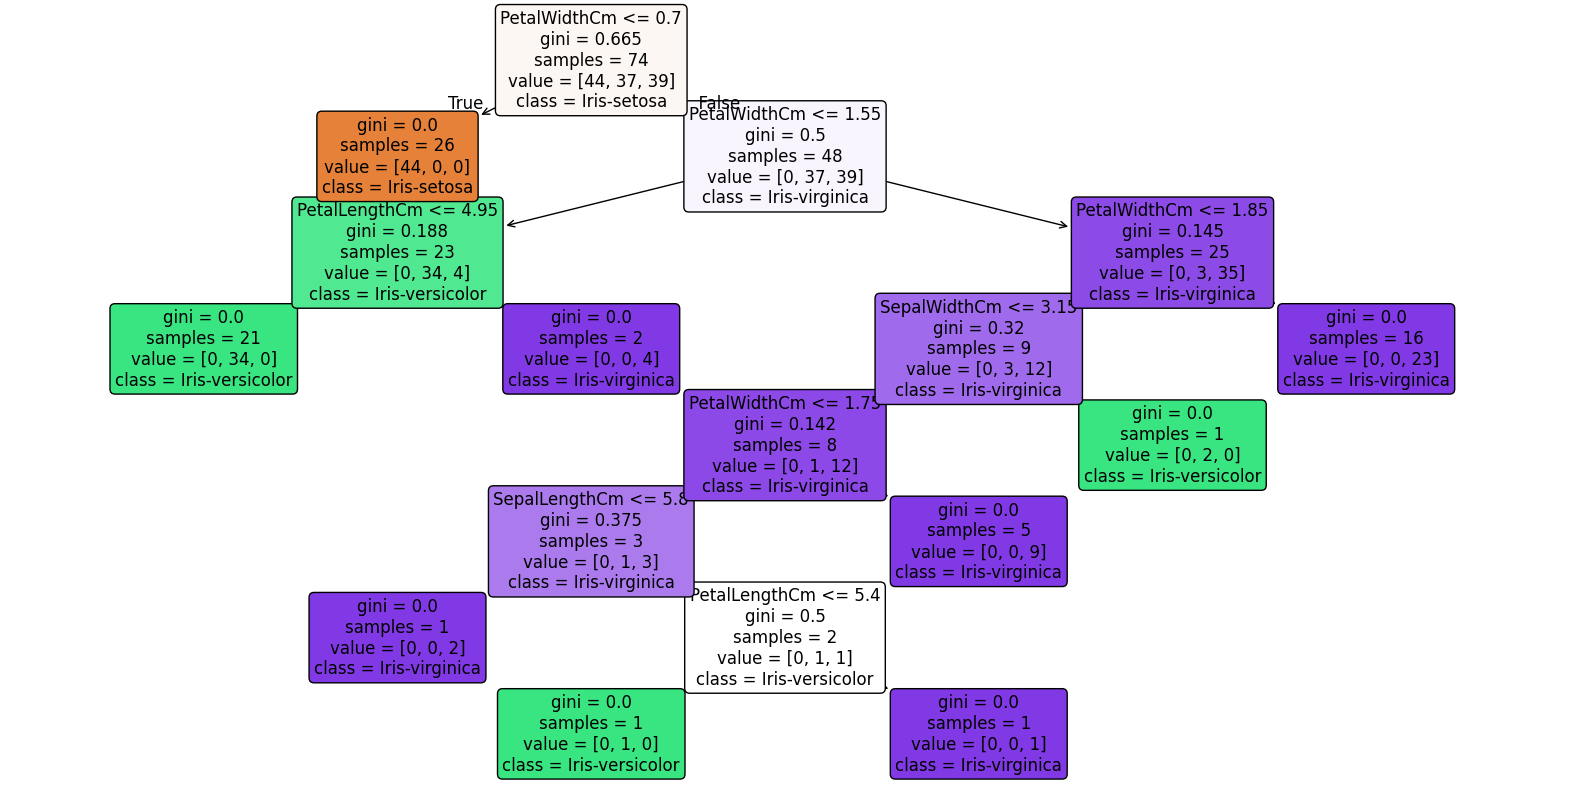

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/drive/MyDrive/INTERNSHIP/M.A.Miduna Varshini /Dataset/Iris.csv"
data = pd.read_csv(file_path)

# Fix column typos if needed
data.rename(columns={
    "SepalLengt": "SepalLengthCm",
    "SepalWidt": "SepalWidthCm",
    "PetalLengt": "PetalLengthCm",
    "PetalWidtht": "PetalWidthCm"
}, inplace=True)

# Features and target
X = data[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = data["Species"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=5, random_state=42)  # small for plotting
rf.fit(X_train, y_train)

# Plot the first tree
estimator = rf.estimators_[0]  # take the first tree

plt.figure(figsize=(20,10))
tree.plot_tree(estimator,
               feature_names=X.columns,
               class_names=rf.classes_,
               filled=True,
               rounded=True,
               fontsize=12)
plt.show()
